<a href="https://colab.research.google.com/github/Hataeju/Clustering/blob/main/%EA%B5%B0%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Clustering용 데이터 준비

In [17]:
# scikit-learn toy dataset 로드
# Clustering전용 데이터는 제공하고 있지 않아, iris 데이터를 사용
iris = datasets.load_iris()
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [18]:
# 데이터 프레임으로 변환
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [19]:
# (편의를 위해) 컬럼값 명을 변경하는 것 외에, 별다른 전처리는 수행하지 않는다. (결측치, 이상치, 명목형변수 등 없음)
#df.rename(columns = {'old_nm' : 'new_nm'}, inplace = True)로도 가능
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

In [20]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 모델 학습

In [21]:
# 학습, 테스트 데이터셋 분리
# 비지도 학습의 경우 모든 데이터가 학습에 사용되므로 분리하지 않는다.
X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [43]:
# 모델 학습
model = KMeans(n_clusters=3, random_state=2)
model.fit(X_train)

KMeans(n_clusters=3, random_state=2)

In [44]:
# 학습된 모델 attribute 확인
print ("각 클러스터 중심점 좌표: ", model.cluster_centers_)
print ("각 샘플의 label: ", model.labels_)
print ("중심으로부터의 거리의 합=Inertia: ", model.inertia_)
print ("반복 횟수: ", model.n_iter_)
print ("fit될때까지 살펴본 feature의 수: ", model.n_features_in_)

각 클러스터 중심점 좌표:  [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
각 샘플의 label:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
중심으로부터의 거리의 합=Inertia:  78.851441426146
반복 횟수:  3
fit될때까지 살펴본 feature의 수:  4


# 모델 평가

In [ ]:
# 비지도 학습의 경우 목적자체가 성능측정 방법이 별도로 존재하지 않으나
# 해당 데이터셋의 경우 주어진 Label값을 기준으로 잘 그룹화되었는지 확인해볼 수 있다.

Text(0, 0.5, 'petal_width')

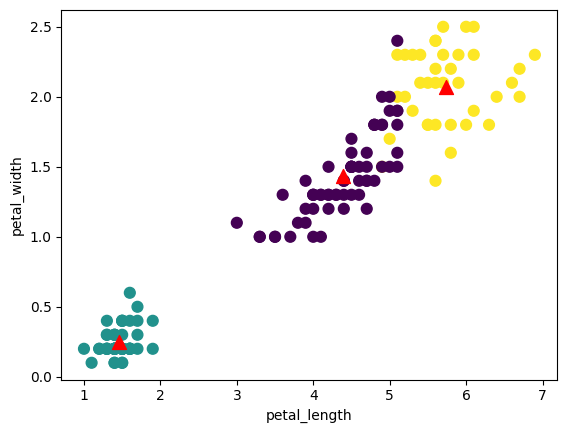

In [45]:
# 학습 결과 확인
plt.scatter(X_train.iloc[:,2], X_train.iloc[:,3], c=model.labels_, s=60)
plt.scatter(model.cluster_centers_[:,2], model.cluster_centers_[:,3], c='red', marker='^', s=100)
plt.xlabel('petal_length')
plt.ylabel('petal_width')

## 과대적합/과소적합 판단

Text(0, 0.5, 'inertia')

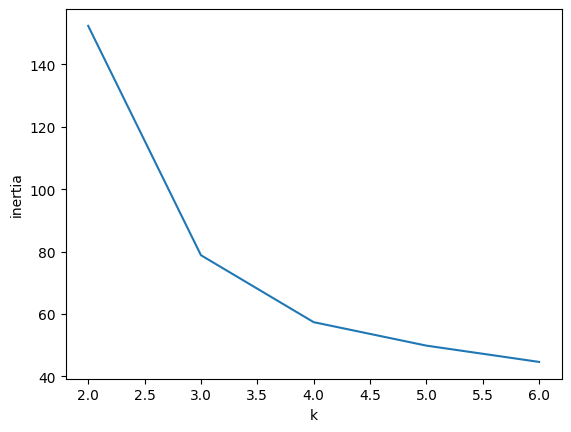

In [47]:
# 최적의 K값 찾기 (엘보우 기법)
inertia = []
for k in range(2, 7):
  model_tmp = KMeans(n_clusters = k)
  model_tmp.fit(X_train)
  inertia.append(model_tmp.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')

=> 클러스터 갯수가 3개인 것이 최적인 것으로 보임

## 모델 개선

In [ ]:
# 해당 데이터셋에서는 나타나지 않으나, 다른 데이터셋의 경우
# 학습을 방해하는 Feature를 제외시킨다거나
# 거리기반의 알고리즘인 만큼 Scale이 너무 다른 Feature가 존재한다면 영향을 받을 수 있으므로 이러한 경우 정규화하는 등의 전처리를 통해 모델을 개선할 수 있다.

## 모델 적용

In [48]:
# 새로운 데이터로 predict
sample_new = [[4.5, 3.0, 1.5, 0.3]]
model.predict(sample_new)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [49]:
# 각 클러스터와의 거리 확인
def dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

for i in range(3):
  print("클러스터 {}와의 거리: {}".format(i, dist(sample_new, model.cluster_centers_[i])))

클러스터 0와의 거리: 3.4184957837500938
클러스터 1와의 거리: 0.6660180177742943
클러스터 2와의 거리: 5.163333598598439
